In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,275.0000,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,243.0000,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,198.0000,...,152.20,1575.0,0.1374,205.0000,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [5]:
dados['diagnostico'].value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

## **Pré Processamento dos Dados**

In [6]:

SEED = 123

np.random.seed(SEED)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

x = dados.drop(['id', 'diagnostico', 'exame_33'], axis = 1)
y = dados['diagnostico']

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= .30)

### **Criando o Modelo**

In [7]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(max_depth= 10, n_estimators= 10)

# Treinando o Modelo
classificador.fit(x_train, y_train)

# Fazendo predições com o Modelo
previsoes = classificador.predict(x_test)

print(f'Acurácia do Modelo {accuracy_score(y_test, previsoes) * 100}\n')


# Verificando a performance do modelo
print(classification_report(y_test, previsoes))

Acurácia do Modelo 97.6608187134503

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       103
           M       0.98      0.96      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



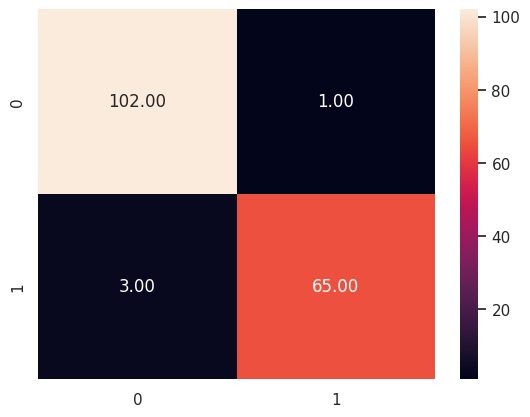

In [8]:
sns.heatmap(confusion_matrix(y_test, previsoes),annot= True, fmt= '.2f');

---

### **Modelo Aleatório para Referencia**

Aqui é a lógica é bastante simples. Vou pegar a classe mais frequente dentro do alvo e vou chutar que o maior parte dos resultados será a mesma. 

Com isso, tenho condições de saber minamente se meu modelo tem uma performance aceitável ou não.

In [9]:
from sklearn.dummy import DummyClassifier

SEED = 123
np.random.seed(SEED)

referencia = DummyClassifier(strategy='most_frequent')
referencia.fit(x_train, y_train)

predicoes = referencia.predict(x_test)

print(f'Resultado {accuracy_score(y_test, predicoes)* 100}')

Resultado 60.23391812865497


### **Formatando DataFrame para Impressão**

In [10]:

dados_plot = pd.concat([x, dados['diagnostico']], axis= 1)

dados_melt = pd.melt(dados_plot, id_vars = 'diagnostico', var_name= 'exames', value_name= 'valores')

dados_melt

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,124.00000


dados.corr()

In [11]:
# Excluindo variáveis com valores fixos da Base de dados
dados1 = dados.drop(['exame_33', 'exame_4', 'exame_29', 'id'], axis = 1)

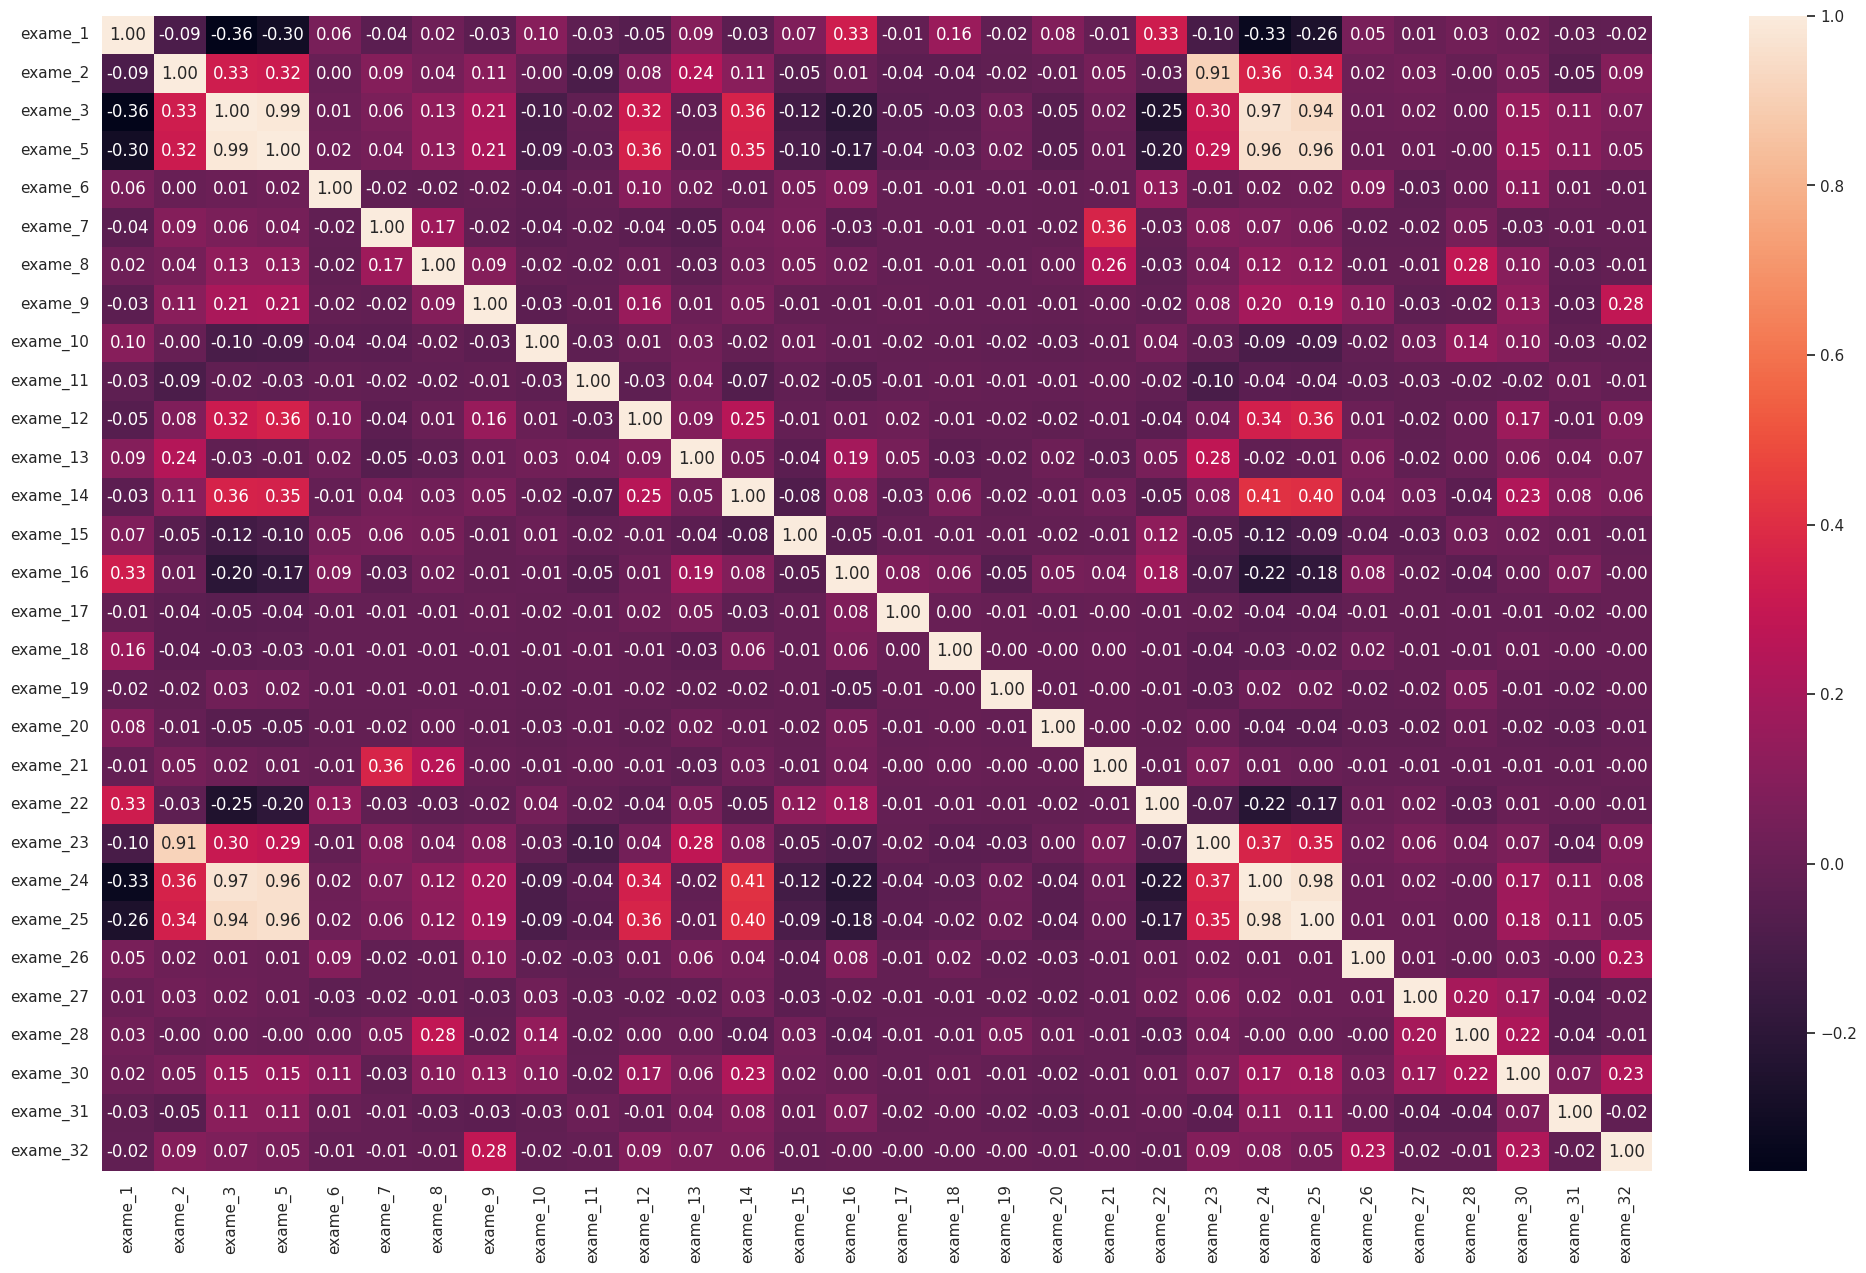

In [12]:
plt.figure(figsize = (25,15))
correlacao = dados1.drop('diagnostico', axis = 1).corr()
sns.heatmap(correlacao, annot= True, fmt= '.2f');

In [13]:
# Identificando apenas os valores altamente correlacionados
correlacao_v1 = correlacao[abs(correlacao) > 0.8]

In [14]:
correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,NaN,NaN,1.000000,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,0.986507,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
correlacao_v2 = correlacao_v1.sum()
correlacao_v2

exame_1     1.000000
exame_2     1.912045
exame_3     3.898443
exame_5     3.904840
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.000000
exame_23    1.912045
exame_24    3.907085
exame_25    3.878341
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [16]:
# Indentificando as variáveis que possuem uma alta correlação entre si
correlacao_v3 = correlacao_v2[correlacao_v2 > 1]

correlacao_v3 = correlacao_v3.index.to_list()

correlacao_v3.append('diagnostico')
correlacao_v3.remove('exame_24')
correlacao_v3.remove('exame_5')
correlacao_v3.remove('exame_23')

correlacao_v3

['exame_2', 'exame_3', 'exame_25', 'diagnostico']

/tmp/ipykernel_821251/404062499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados1[correlacao_v3].corr(), annot = True, fmt= '.2f')


<AxesSubplot: >

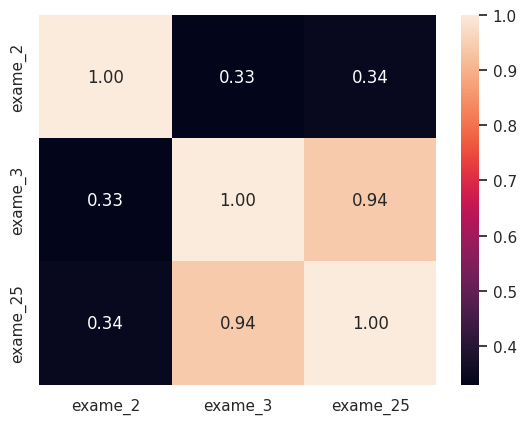

In [17]:
sns.heatmap(dados1[correlacao_v3].corr(), annot = True, fmt= '.2f')

In [18]:
x = dados1.drop(correlacao_v3, axis = 1)
x

,exame_1,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_21,exame_22,exame_23,exame_24,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1095.0000,0.9053,...,0.006193,25.38,17.33,184.60,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.003532,24.99,23.41,158.80,0.12380,0.18660,0.2416,0.1860,275.0000,0.08902
2,19.69,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.004571,23.57,25.53,152.50,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1156.0000,...,0.009208,14.91,26.50,98.87,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.005115,22.54,16.67,152.20,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,1176.0000,1256.0000,...,0.004239,25.45,26.40,166.10,141.00000,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2463.0000,...,0.002498,23.69,38.25,155.00,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,0.4564,1075.0000,...,0.003892,18.98,34.12,126.70,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,1265.0,0.11780,0.27700,0.35140,152.00000,0.2397,0.07016,726.0000,1595.0000,...,0.006185,25.74,39.42,184.60,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


### **Função para Verificar performance do Modelo**

In [22]:
def modelo(x,y):

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 123, stratify= y, shuffle= True)

    # Treinando o Modelo
    classificador.fit(x_train, y_train)

    # Fazendo predições com o Modelo
    previsoes = classificador.predict(x_test)

    print(f'Acurácia do Modelo {accuracy_score(y_test, previsoes) * 100}\n')


    # Verificando a performance do modelo
    print(classification_report(y_test, previsoes))

    sns.heatmap(confusion_matrix(y_test, previsoes), annot= True, fmt = '.2f')
        

In [23]:
x.shape, y.shape

((569, 27), (569,))

Acurácia do Modelo 97.6608187134503

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       107
           M       0.97      0.97      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



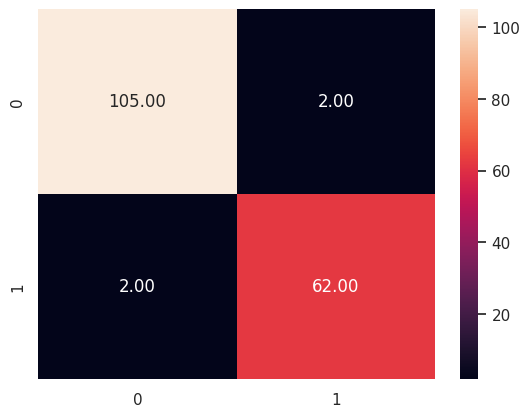

In [24]:
modelo(x, y)